I've generated synthetic dataset and simulated polynomial function and components like trend, noise and seasonal to the data, I've printed the first 10 rows of the generated data and plotted the sales data in a line graph, after that I've plotted the highest and lowest sales data using scatter plot in the same sales data line graph for easy understanding after that I've plotted the sales by each quarter from 2020 to 2023 and at last I've used to ETS model and exponential smoothing to forecast the next two quarters of 2024.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.holtwinters import ExponentialSmoothing


c:\Users\Jasper\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#Variables for polynomial function
a=0.2
b=50
c=1000

In [3]:
# Trend Component function
def generate_trend(t):
    return a * t ** 2 + b * t + c 

In [4]:
# seasonal component function
def generate_seasonal(t):
    quarters = np.floor((t - 1) / 3) % 4  
    seasonal_patterns = [100, 150, 200, 250]  
    return seasonal_patterns[int(quarters)]


In [5]:
# adding noise
def add_noise(n):
    return np.random.normal(0, 50, n) 

1 a) Generating the syntetic dataset and printing the first 10 rows of the data

In [6]:
# Generating synthetic data set and printing first ten rows
def generate_data(start_year, end_year):
    data = []
    for year in range(start_year, end_year + 1):
        for month in range(1, 13):
            t = (year - start_year) * 12 + month
            trend = generate_trend(t)
            seasonal = generate_seasonal(t)
            np.random.seed(45)
            noise = add_noise(1)[0]
            sales = max(0, trend + seasonal + noise) 
            data.append({'Year': year, 'Month': month, 'Sales': sales})
    return pd.DataFrame(data)
sales_data = generate_data(2020, 2024)
print("First 10 rows of the synthetic sales:")
print(sales_data.head(10))

First 10 rows of the synthetic sales:
   Year  Month        Sales
0  2020      1  1151.518739
1  2020      2  1202.118739
2  2020      3  1253.118739
3  2020      4  1354.518739
4  2020      5  1406.318739
5  2020      6  1458.518739
6  2020      7  1561.118739
7  2020      8  1614.118739
8  2020      9  1667.518739
9  2020     10  1771.318739


Plotting the sales over time in a line graph

Text(0, 0.5, 'Sales in Pounds')

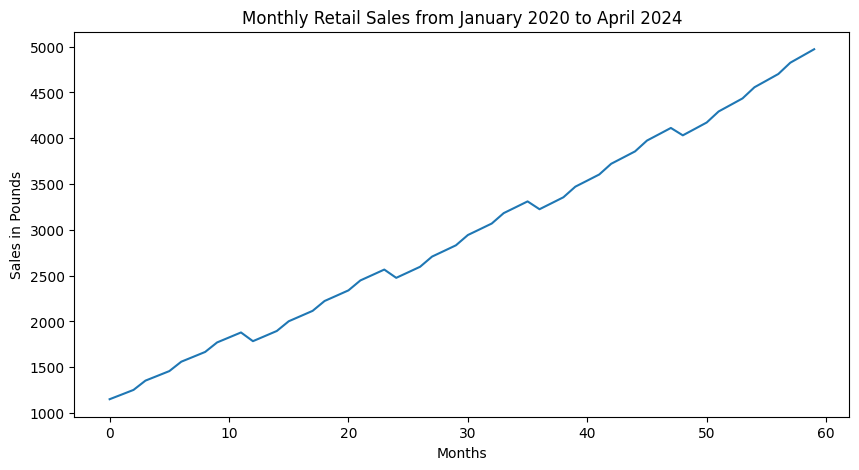

In [7]:
#plotting the sales data
plt.figure(figsize=(10, 5))
plt.plot(sales_data['Sales'])
plt.title('Monthly Retail Sales from January 2020 to April 2024')
plt.xlabel('Months')
plt.ylabel('Sales in Pounds')

plotting the lowest and highest sales over the given span

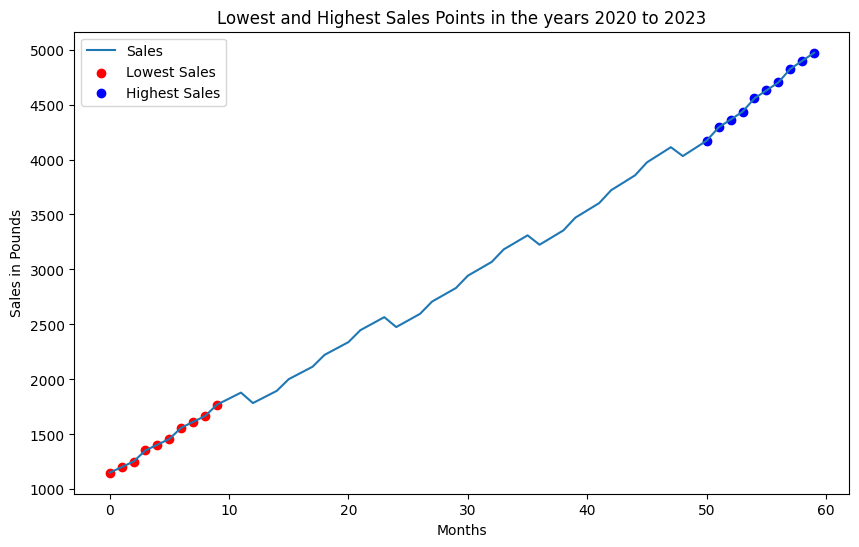

In [8]:

lowest_sales = sales_data.nsmallest(10, 'Sales')
highest_sales = sales_data.nlargest(10, 'Sales')
plt.figure(figsize=(10, 6))
plt.plot(sales_data['Sales'], label='Sales')
plt.scatter(lowest_sales.index, lowest_sales['Sales'], color='red', label='Lowest Sales')
plt.scatter(highest_sales.index, highest_sales['Sales'], color='blue', label='Highest Sales')
plt.title('Lowest and Highest Sales Points in the years 2020 to 2023')
plt.xlabel('Months')
plt.ylabel('Sales in Pounds')
plt.legend()


Highest sales in each quarter 


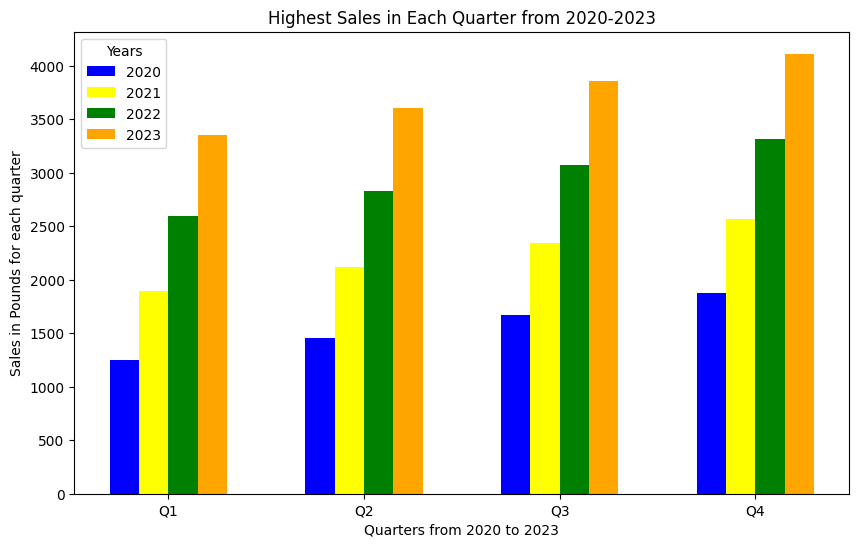

In [9]:
sales_data['Quarter'] = pd.to_datetime(sales_data['Month'], format='%m').dt.quarter
quarterly_max_sales = sales_data.groupby(['Year', 'Quarter'])['Sales'].max().unstack()
quarters = ['Q1', 'Q2', 'Q3', 'Q4']
years = np.arange(2020, 2024)

# changed the default graph color for better visualization

graph_color=['blue','yellow','green','orange']

# Plotted the grouped bar chart to see the quarter with highest sales

plt.figure(figsize=(10, 6))
bar_width = 0.15
for i, year in enumerate(years):
    plt.bar(np.arange(len(quarters)) + i * bar_width, quarterly_max_sales.loc[year], 
            width=bar_width, label=str(year),color=graph_color[i])

plt.xlabel('Quarters from 2020 to 2023')
plt.ylabel('Sales in Pounds for each quarter')
plt.title('Highest Sales in Each Quarter from 2020-2023')
plt.xticks(np.arange(len(quarters)) + 0.5 * (len(years) - 1) * bar_width, quarters)
plt.legend(title='Years')
plt.show()

1 c) 
Inserting the ETS Model into the randomly generated data and forecasting the next two quarters of 2024

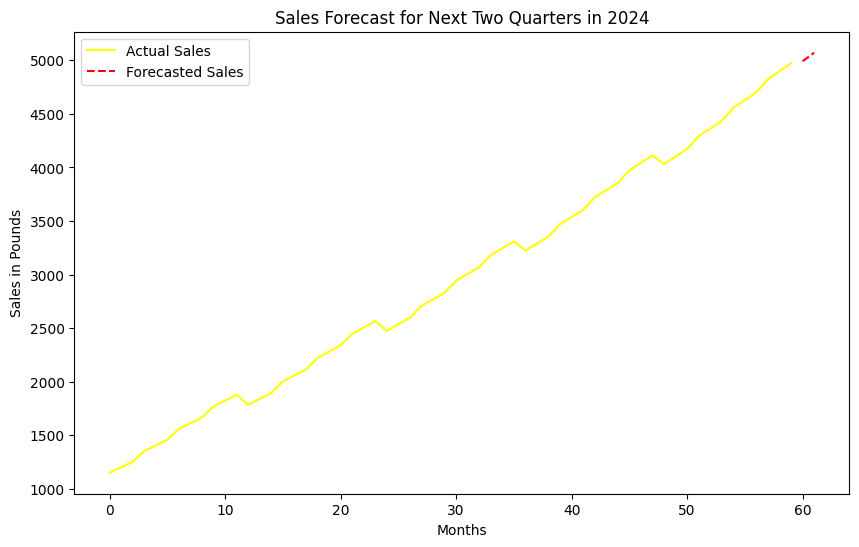

In [10]:

# Fitted the ETS model
model = ExponentialSmoothing(sales_data['Sales'], seasonal_periods=4, trend='add', seasonal='add')
fit_model = model.fit()

# Generated forecast for the next two quarters in 2024
forecast = fit_model.forecast(steps=2)

# Visualized the forecast
plt.figure(figsize=(10, 6))
plt.plot(sales_data.index, sales_data['Sales'], label='Actual Sales', color='yellow')
plt.plot(forecast.index, forecast, label='Forecasted Sales', linestyle='--', color='red')
plt.title('Sales Forecast for Next Two Quarters in 2024')
plt.xlabel('Months')
plt.ylabel('Sales in Pounds')
plt.legend()

